In [1]:
import pandas as pd
import numpy as np

In [24]:
df=pd.read_csv("models_cc_data/df_cc_init.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df['date_time'] = pd.to_datetime(df['date_time']).dt.floor('min')
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,date_time_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
0,19128,6,65.24,66.29,195.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
1,19129,7,72.97,74.12,196.3,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
2,19130,8,65.92,66.98,199.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
3,19131,9,72.45,73.67,232.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
4,19132,10,60.01,60.98,182.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,2023-09-14 08:00:00,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2391,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2392,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2393,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2395 non-null   int64         
 1   device_id        2395 non-null   int64         
 2   active_power     2395 non-null   float64       
 3   direct_power     2395 non-null   float64       
 4   charge_capacity  2395 non-null   float64       
 5   date_time        2395 non-null   datetime64[ns]
 6   T                2395 non-null   float64       
 7   U                2395 non-null   float64       
 8   Ff               2395 non-null   float64       
 9   RRR              2395 non-null   float64       
 10  DD_WE            2395 non-null   int64         
 11  DD_NS            2395 non-null   int64         
 12  Po(p)            2395 non-null   float64       
 13  POA              2395 non-null   float64       
 14  difference       2395 non-null   object 

In [26]:
df.drop(['difference','date_time_b'], axis=1, inplace=True)
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
0,19128,6,65.24,66.29,195.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,31.25,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
1,19129,7,72.97,74.12,196.3,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,35.22,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
2,19130,8,65.92,66.98,199.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,39.62,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
3,19131,9,72.45,73.67,232.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,50.39,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
4,19132,10,60.01,60.98,182.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,25.24,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.75,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2391,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.74,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2392,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,4.91,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14
2393,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,96.0,2.0,4.0,...,5.23,8.5,98.0,2.0,5.0,1.0,0.0,1011.46,959.15,14


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2395 non-null   int64         
 1   device_id        2395 non-null   int64         
 2   active_power     2395 non-null   float64       
 3   direct_power     2395 non-null   float64       
 4   charge_capacity  2395 non-null   float64       
 5   date_time        2395 non-null   datetime64[ns]
 6   T                2395 non-null   float64       
 7   U                2395 non-null   float64       
 8   Ff               2395 non-null   float64       
 9   RRR              2395 non-null   float64       
 10  DD_WE            2395 non-null   int64         
 11  DD_NS            2395 non-null   int64         
 12  Po(p)            2395 non-null   float64       
 13  POA              2395 non-null   float64       
 14  cc_diff          2395 non-null   float64

In [29]:
df_dv6 = df[df['device_id'] == 6]
df_dv6.to_csv('models_cc_data/df_dv6.csv')
df_dv6

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
0,19128,6,65.24,66.29,195.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,31.25,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
5,19218,6,77.74,79.08,444.6,2023-09-14 14:00:00,31.2,63.0,3.0,0.0,...,65.24,31.2,60.0,2.0,0.0,1.0,-1.0,996.92,942.25,14
10,19308,6,11.43,11.73,565.7,2023-09-14 17:00:00,28.6,75.0,5.0,0.0,...,77.74,31.2,63.0,3.0,0.0,1.0,-1.0,995.86,801.45,17
15,19398,6,0.00,0.00,568.1,2023-09-14 20:00:00,28.0,79.0,2.0,0.0,...,11.43,28.6,75.0,5.0,0.0,1.0,0.0,996.39,136.03,20
20,19758,6,16.76,17.11,20.1,2023-09-15 08:00:00,27.9,83.0,2.0,0.0,...,0.00,26.7,86.0,1.0,0.0,1.0,0.0,997.18,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,50163,6,1.69,1.98,140.8,2024-02-21 17:00:00,15.3,97.0,3.0,0.0,...,12.24,15.7,91.0,3.0,0.0,1.0,0.0,1000.09,881.45,17
2375,50178,6,0.00,0.00,141.3,2024-02-21 20:00:00,13.4,98.0,3.0,0.7,...,1.69,15.3,97.0,3.0,0.0,1.0,0.0,1001.28,177.92,20
2380,50238,6,0.93,1.35,0.6,2024-02-22 08:00:00,8.6,98.0,2.0,5.0,...,0.00,9.2,99.0,2.0,4.0,1.0,0.0,1008.16,0.00,8
2385,50253,6,4.75,5.07,25.6,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,...,0.93,8.6,98.0,2.0,5.0,1.0,0.0,1011.33,364.88,11


In [30]:
df_dv7 = df[df['device_id'] == 7]
df_dv7.to_csv('models_cc_data/df_dv7.csv')
df_dv7

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
1,19129,7,72.97,74.12,196.3,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,35.22,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
6,19219,7,79.34,80.84,447.2,2023-09-14 14:00:00,31.2,63.0,3.0,0.0,...,72.97,31.2,60.0,2.0,0.0,1.0,-1.0,996.92,942.25,14
11,19309,7,8.81,9.11,571.1,2023-09-14 17:00:00,28.6,75.0,5.0,0.0,...,79.34,31.2,63.0,3.0,0.0,1.0,-1.0,995.86,801.45,17
16,19399,7,0.00,0.00,573.3,2023-09-14 20:00:00,28.0,79.0,2.0,0.0,...,8.81,28.6,75.0,5.0,0.0,1.0,0.0,996.39,136.03,20
21,19759,7,46.70,47.42,19.1,2023-09-15 08:00:00,27.9,83.0,2.0,0.0,...,0.00,26.7,86.0,1.0,0.0,1.0,0.0,997.18,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,50164,7,1.65,2.02,142.2,2024-02-21 17:00:00,15.3,97.0,3.0,0.0,...,13.17,15.7,91.0,3.0,0.0,1.0,0.0,1000.09,881.45,17
2376,50179,7,0.00,0.00,142.6,2024-02-21 20:00:00,13.4,98.0,3.0,0.7,...,1.65,15.3,97.0,3.0,0.0,1.0,0.0,1001.28,177.92,20
2381,50239,7,0.92,1.28,0.6,2024-02-22 08:00:00,8.6,98.0,2.0,5.0,...,0.00,9.2,99.0,2.0,4.0,1.0,0.0,1008.16,0.00,8
2386,50254,7,4.74,5.08,25.7,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,...,0.92,8.6,98.0,2.0,5.0,1.0,0.0,1011.33,364.88,11


In [31]:
df_dv8 = df[df['device_id'] == 8]
df_dv8.to_csv('models_cc_data/df_dv8.csv')
df_dv8

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
2,19130,8,65.92,66.98,199.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,39.62,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
7,19220,8,77.25,78.58,450.9,2023-09-14 14:00:00,31.2,63.0,3.0,0.0,...,65.92,31.2,60.0,2.0,0.0,1.0,-1.0,996.92,942.25,14
12,19310,8,7.89,8.11,565.2,2023-09-14 17:00:00,28.6,75.0,5.0,0.0,...,77.25,31.2,63.0,3.0,0.0,1.0,-1.0,995.86,801.45,17
17,19400,8,0.00,0.00,567.3,2023-09-14 20:00:00,28.0,79.0,2.0,0.0,...,7.89,28.6,75.0,5.0,0.0,1.0,0.0,996.39,136.03,20
22,19760,8,45.20,45.87,20.0,2023-09-15 08:00:00,27.9,83.0,2.0,0.0,...,0.00,26.7,86.0,1.0,0.0,1.0,0.0,997.18,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,50165,8,1.63,2.01,141.4,2024-02-21 17:00:00,15.3,97.0,3.0,0.0,...,13.28,15.7,91.0,3.0,0.0,1.0,0.0,1000.09,881.45,17
2377,50180,8,0.00,0.00,141.8,2024-02-21 20:00:00,13.4,98.0,3.0,0.7,...,1.63,15.3,97.0,3.0,0.0,1.0,0.0,1001.28,177.92,20
2382,50240,8,0.89,1.38,0.5,2024-02-22 08:00:00,8.6,98.0,2.0,5.0,...,0.00,9.2,99.0,2.0,4.0,1.0,0.0,1008.16,0.00,8
2387,50255,8,4.91,5.09,25.1,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,...,0.89,8.6,98.0,2.0,5.0,1.0,0.0,1011.33,364.88,11


In [32]:
df_dv9 = df[df['device_id'] == 9]
df_dv9.to_csv('models_cc_data/df_dv9.csv')
df_dv9

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
3,19131,9,72.45,73.67,232.2,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,50.39,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
8,19221,9,81.16,82.51,492.9,2023-09-14 14:00:00,31.2,63.0,3.0,0.0,...,72.45,31.2,60.0,2.0,0.0,1.0,-1.0,996.92,942.25,14
13,19311,9,10.24,10.67,614.2,2023-09-14 17:00:00,28.6,75.0,5.0,0.0,...,81.16,31.2,63.0,3.0,0.0,1.0,-1.0,995.86,801.45,17
18,19401,9,0.00,0.00,616.7,2023-09-14 20:00:00,28.0,79.0,2.0,0.0,...,10.24,28.6,75.0,5.0,0.0,1.0,0.0,996.39,136.03,20
23,19761,9,62.12,62.96,25.3,2023-09-15 08:00:00,27.9,83.0,2.0,0.0,...,0.00,26.7,86.0,1.0,0.0,1.0,0.0,997.18,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,50166,9,1.04,1.33,155.5,2024-02-21 17:00:00,15.3,97.0,3.0,0.0,...,12.89,15.7,91.0,3.0,0.0,1.0,0.0,1000.09,881.45,17
2378,50181,9,0.00,0.00,156.1,2024-02-21 20:00:00,13.4,98.0,3.0,0.7,...,1.04,15.3,97.0,3.0,0.0,1.0,0.0,1001.28,177.92,20
2383,50241,9,1.03,1.32,0.7,2024-02-22 08:00:00,8.6,98.0,2.0,5.0,...,0.00,9.2,99.0,2.0,4.0,1.0,0.0,1008.16,0.00,8
2388,50256,9,5.23,5.56,26.9,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,...,1.03,8.6,98.0,2.0,5.0,1.0,0.0,1011.33,364.88,11


In [33]:
df_dv10 = df[df['device_id'] == 10]
df_dv10.to_csv('models_cc_data/df_dv10.csv')
df_dv10

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,U,Ff,RRR,...,active_power_b,T_b,U_b,Ff_b,RRR_b,DD_WE_b,DD_NS_b,Po(p)_b,POA_b,hour
4,19132,10,60.01,60.98,182.0,2023-09-14 11:00:00,31.2,60.0,2.0,0.0,...,25.24,27.5,83.0,0.0,0.0,-1.0,0.0,996.39,441.37,11
9,19222,10,78.86,80.19,419.1,2023-09-14 14:00:00,31.2,63.0,3.0,0.0,...,60.01,31.2,60.0,2.0,0.0,1.0,-1.0,996.92,942.25,14
14,19312,10,11.47,11.85,549.7,2023-09-14 17:00:00,28.6,75.0,5.0,0.0,...,78.86,31.2,63.0,3.0,0.0,1.0,-1.0,995.86,801.45,17
19,19402,10,0.00,0.00,552.1,2023-09-14 20:00:00,28.0,79.0,2.0,0.0,...,11.47,28.6,75.0,5.0,0.0,1.0,0.0,996.39,136.03,20
24,19762,10,15.29,15.63,17.4,2023-09-15 08:00:00,27.9,83.0,2.0,0.0,...,0.00,26.7,86.0,1.0,0.0,1.0,0.0,997.18,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,50167,10,1.05,1.39,143.1,2024-02-21 17:00:00,15.3,97.0,3.0,0.0,...,12.79,15.7,91.0,3.0,0.0,1.0,0.0,1000.09,881.45,17
2379,50182,10,0.00,0.00,143.6,2024-02-21 20:00:00,13.4,98.0,3.0,0.7,...,1.05,15.3,97.0,3.0,0.0,1.0,0.0,1001.28,177.92,20
2384,50242,10,0.98,1.32,0.6,2024-02-22 08:00:00,8.6,98.0,2.0,5.0,...,0.00,9.2,99.0,2.0,4.0,1.0,0.0,1008.16,0.00,8
2389,50257,10,4.87,5.28,26.0,2024-02-22 11:00:00,8.5,98.0,2.0,5.0,...,0.98,8.6,98.0,2.0,5.0,1.0,0.0,1011.33,364.88,11


In [34]:
from sklearn.model_selection import train_test_split
features = ['T', 'U', 'Ff',	'RRR', 'DD_WE', 'DD_NS', 'POA', 'Po(p)', 'hour',
            'T_b', 'U_b', 'Ff_b', 'RRR_b', 'DD_WE_b', 'DD_NS_b', 'POA_b', 'Po(p)_b']

features2 = ['T', 'U', 'Ff',	'RRR', 'DD_WE', 'DD_NS', 'POA', 'Po(p)', 'hour',
            'T_b', 'U_b', 'Ff_b', 'RRR_b', 'DD_WE_b', 'DD_NS_b', 'POA_b', 'Po(p)_b', 'device_id']

X = df[features2]
y = df['cc_diff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())


X6 = df_dv6[features]
y6 = df_dv6['cc_diff']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.20, random_state=100)

X_train6 = X_train6.fillna(X_train6.mean())
X_test6 = X_test6.fillna(X_test6.mean())
y_train6 = y_train6.fillna(y_train6.mean())
y_test6 = y_test6.fillna(y_test6.mean())


X7 = df_dv7[features]
y7 = df_dv7['cc_diff']
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.20, random_state=100)

X_train7 = X_train7.fillna(X_train7.mean())
X_test7 = X_test7.fillna(X_test7.mean())
y_train7 = y_train7.fillna(y_train7.mean())
y_test7 = y_test7.fillna(y_test7.mean())


X8 = df_dv8[features]
y8 = df_dv8['cc_diff']
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.20, random_state=100)

X_train8 = X_train8.fillna(X_train8.mean())
X_test8 = X_test8.fillna(X_test8.mean())
y_train8 = y_train8.fillna(y_train8.mean())
y_test8 = y_test8.fillna(y_test8.mean())


X9 = df_dv9[features]
y9 = df_dv9['cc_diff']
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.20, random_state=100)

X_train9 = X_train9.fillna(X_train9.mean())
X_test9 = X_test9.fillna(X_test9.mean())
y_train9 = y_train9.fillna(y_train9.mean())
y_test9 = y_test9.fillna(y_test9.mean())


X10 = df_dv10[features]
y10 = df_dv10['cc_diff']
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.20, random_state=100)

X_train10 = X_train10.fillna(X_train10.mean())
X_test10 = X_test10.fillna(X_test10.mean())
y_train10 = y_train10.fillna(y_train10.mean())
y_test10 = y_test10.fillna(y_test10.mean())

device_6:
MAE: 22.352152843843527
MSE: 932.7057600382856
RMSE: 30.540231826858903
R2: 0.7785402704972708

device_7:
MAE: 22.577712367309122
MSE: 930.0536477637694
RMSE: 30.496780941007025
R2: 0.7830084651003539

device_8:
MAE: 22.32546356902762
MSE: 895.926199308864
RMSE: 29.932026314783034
R2: 0.7838999871295764

device_9:
MAE: 27.591264138476358
MSE: 1317.0281836052898
RMSE: 36.29088292678052
R2: 0.7957702988751478

device_10:
MAE: 20.21181974965064
MSE: 778.5832203553864
RMSE: 27.903104134762255
R2: 0.7744998691297883

all:
MAE: 24.557918764569195
MSE: 1014.9415630843822
RMSE: 31.858147514951057
R2: 0.816204527891095



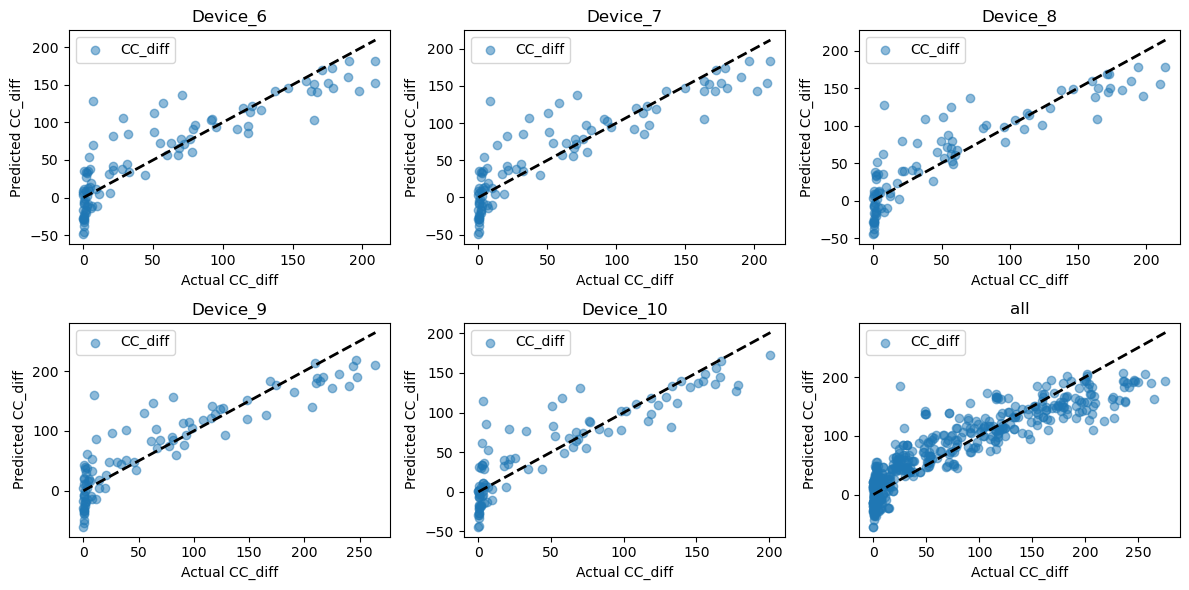

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

lr6 = LinearRegression()
lr6.fit(X_train6, y_train6)
y_pred6 = lr6.predict(X_test6)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
# print('MAPE:', np.mean(np.abs((y_test6 - y_pred6)/y_test6)))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()


lr7 = LinearRegression()
lr7.fit(X_train7, y_train7)
y_pred7 = lr7.predict(X_test7)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
# print('MAPE:', np.mean(np.abs((y_test7 - y_pred7)/y_test7)))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()


lr8 = LinearRegression()
lr8.fit(X_train8, y_train8)
y_pred8 = lr8.predict(X_test8)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
# print('MAPE:', np.mean(np.abs((y_test8 - y_pred8)/y_test8)))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()


lr9 = LinearRegression()
lr9.fit(X_train9, y_train9)
y_pred9 = lr9.predict(X_test9)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
# print('MAPE:', np.mean(np.abs((y_test9 - y_pred9)/y_test9)))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()


lr10 = LinearRegression()
lr10.fit(X_train10, y_train10)
y_pred10 = lr10.predict(X_test10)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
# print('MAPE:', np.mean(np.abs((y_test10 - y_pred10)/y_test10)))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
# print('MAPE:', np.mean(np.abs((y_test - y_pred)/y_test)))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()


plt.tight_layout()
plt.show()

device_6:
MAE: 15.777291666666665
MSE: 906.6784541666666
RMSE: 30.111101842454495
R2: 0.7847201402535988

device_7:
MAE: 15.892291666666665
MSE: 916.7290041666665
RMSE: 30.27753299340398
R2: 0.786117247989468

device_8:
MAE: 15.095416666666665
MSE: 879.4136500000001
RMSE: 29.654909374334633
R2: 0.7878828621933056

device_9:
MAE: 19.178124999999998
MSE: 1442.9990374999998
RMSE: 37.98682715758187
R2: 0.77623617640031

device_10:
MAE: 14.137708333333334
MSE: 738.6239125000001
RMSE: 27.177636256672507
R2: 0.7860732358750409

all:
MAE: 10.206638830897704
MSE: 383.7861402922756
RMSE: 19.59046044104823
R2: 0.9305002796126414



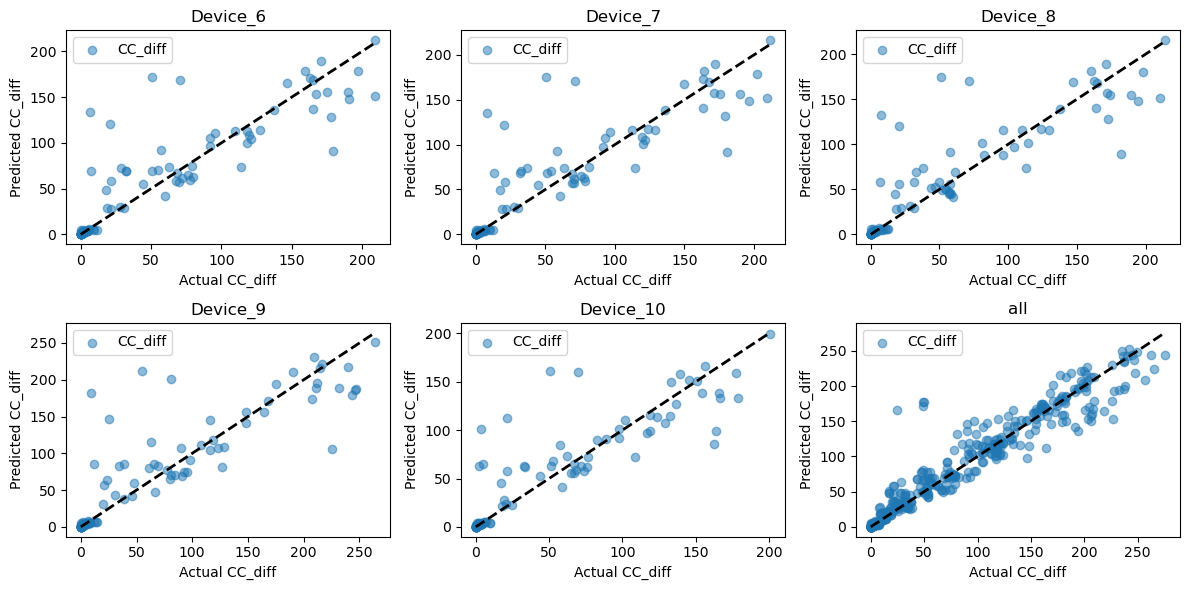

In [39]:
from sklearn.neighbors import KNeighborsRegressor

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

knn6 = KNeighborsRegressor(n_neighbors=5)
knn6.fit(X_train6, y_train6)
y_pred6 = knn6.predict(X_test6)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
# print('MAPE:', np.mean(np.abs((y_test6 - y_pred6)/y_test6)))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()


knn7 = KNeighborsRegressor(n_neighbors=5)
knn7.fit(X_train7, y_train7)
y_pred7 = knn7.predict(X_test7)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
# print('MAPE:', np.mean(np.abs((y_test7 - y_pred7)/y_test7)))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()


knn8 = KNeighborsRegressor(n_neighbors=5)
knn8.fit(X_train8, y_train8)
y_pred8 = knn8.predict(X_test8)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
# print('MAPE:', np.mean(np.abs((y_test8 - y_pred8)/y_test8)))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()


knn9 = KNeighborsRegressor(n_neighbors=5)
knn9.fit(X_train9, y_train9)
y_pred9 = knn9.predict(X_test9)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
# print('MAPE:', np.mean(np.abs((y_test9 - y_pred9)/y_test9)))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()


knn10 = KNeighborsRegressor(n_neighbors=5)
knn10.fit(X_train10, y_train10)
y_pred10 = knn10.predict(X_test10)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
# print('MAPE:', np.mean(np.abs((y_test10 - y_pred10)/y_test10)))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred[y_pred < 0] = 0

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
# print('MAPE:', np.mean(np.abs((y_test - y_pred)/y_test)))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()


plt.tight_layout()
plt.show()


device_6:
MAE: 13.764583333333334
MSE: 716.91375
RMSE: 26.775245096917416
R2: 0.8297774797217183

device_7:
MAE: 14.519791666666668
MSE: 720.1119791666666
RMSE: 26.834902257445744
R2: 0.8319901179521141

device_8:
MAE: 13.640625
MSE: 648.0603124999999
RMSE: 25.457028744533403
R2: 0.8436859621025761

device_9:
MAE: 21.189583333333335
MSE: 1798.9668749999998
RMSE: 42.41422962874606
R2: 0.7210367463746934

device_10:
MAE: 14.465625000000001
MSE: 761.0836458333333
RMSE: 27.587744486154232
R2: 0.7795682500577702

all:
MAE: 5.640292275574113
MSE: 238.5300835073069
RMSE: 15.444419170279824
R2: 0.9568046566374018



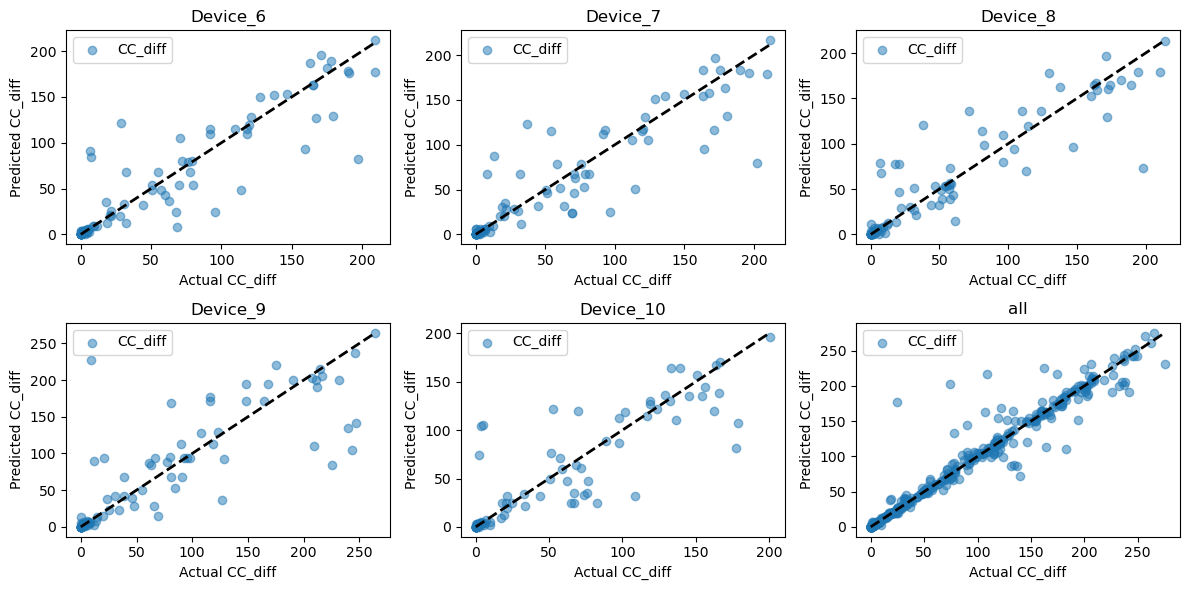

In [40]:
from sklearn.tree import DecisionTreeRegressor

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

dtr6 = DecisionTreeRegressor(random_state=100)
dtr6.fit(X_train6, y_train6)
y_pred6 = dtr6.predict(X_test6)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()


dtr7 = DecisionTreeRegressor(random_state=100)
dtr7.fit(X_train7, y_train7)
y_pred7 = dtr7.predict(X_test7)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()


dtr8 = DecisionTreeRegressor(random_state=100)
dtr8.fit(X_train8, y_train8)
y_pred8 = dtr8.predict(X_test8)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()


dtr9 = DecisionTreeRegressor(random_state=100)
dtr9.fit(X_train9, y_train9)
y_pred9 = dtr9.predict(X_test9)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()


dtr10 = DecisionTreeRegressor(random_state=100)
dtr10.fit(X_train10, y_train10)
y_pred10 = dtr10.predict(X_test10)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()


dtr = DecisionTreeRegressor(random_state=100)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
y_pred[y_pred < 0] = 0

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()


plt.tight_layout()
plt.show()


device_6:
MAE: 13.627781249999998
MSE: 663.64122084375
RMSE: 25.761234847028394
R2: 0.8424263990297594

device_7:
MAE: 13.304572916666658
MSE: 625.2741593854163
RMSE: 25.005482586533223
R2: 0.8541168029345878

device_8:
MAE: 12.835489583333333
MSE: 615.0989166145837
RMSE: 24.801187806526197
R2: 0.8516363469451673

device_9:
MAE: 16.534822916666673
MSE: 1074.55488696875
RMSE: 32.7804040086261
R2: 0.8333702906743204

device_10:
MAE: 12.892614583333332
MSE: 529.2605484687498
RMSE: 23.00566339988373
R2: 0.8467108976614391

all:
MAE: 4.614807933194157
MSE: 103.44614066597066
RMSE: 10.17084758837584
R2: 0.98126696851022



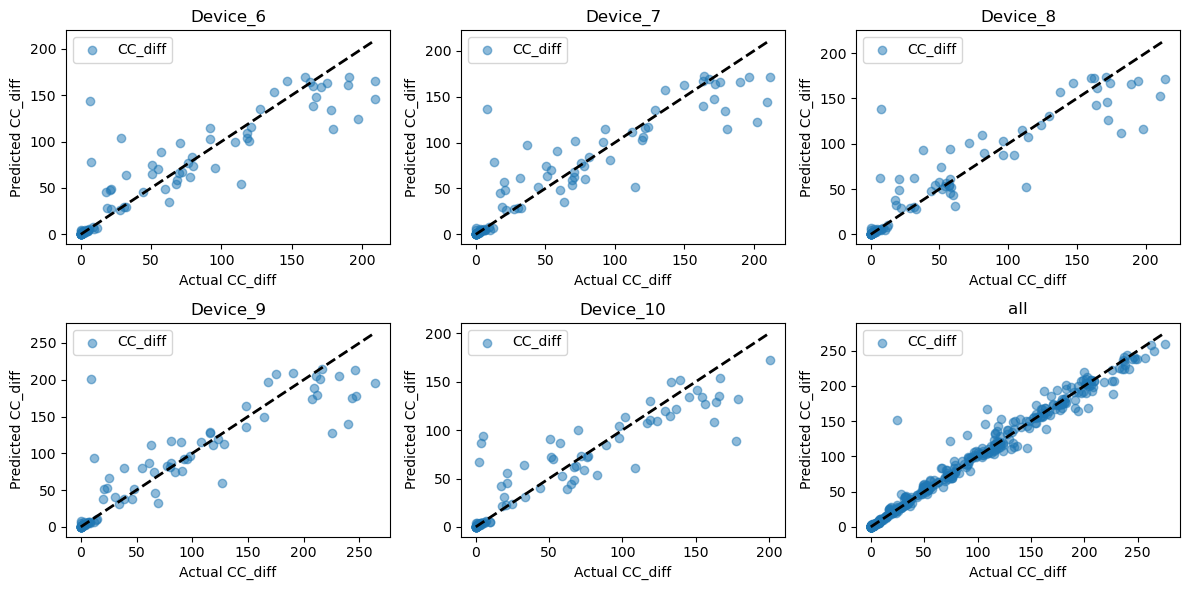

In [41]:
from sklearn.ensemble import RandomForestRegressor

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

rfr6 = RandomForestRegressor(n_estimators=100, random_state=100)
rfr6.fit(X_train6, y_train6)
y_pred6 = rfr6.predict(X_test6)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()


rfr7 = RandomForestRegressor(n_estimators=100, random_state=100)
rfr7.fit(X_train7, y_train7)
y_pred7 = rfr7.predict(X_test7)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()


rfr8 = RandomForestRegressor(n_estimators=100, random_state=100)
rfr8.fit(X_train8, y_train8)
y_pred8 = rfr8.predict(X_test8)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()


rfr9 = RandomForestRegressor(n_estimators=100, random_state=100)
rfr9.fit(X_train9, y_train9)
y_pred9 = rfr9.predict(X_test9)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()


rfr10 = RandomForestRegressor(n_estimators=100, random_state=100)
rfr10.fit(X_train10, y_train10)
y_pred10 = rfr10.predict(X_test10)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()

rfr = RandomForestRegressor(n_estimators=100, random_state=100)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
y_pred[y_pred < 0] = 0

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()


plt.tight_layout()
plt.show()


device_6:
MAE: 14.803329831955653
MSE: 552.0482711732412
RMSE: 23.495707505270857
R2: 0.8689227985453237

device_7:
MAE: 17.99089327931011
MSE: 873.4466917732907
RMSE: 29.554131551667876
R2: 0.796215477723663

device_8:
MAE: 15.799162662359842
MSE: 883.9884099374673
RMSE: 29.73194258600449
R2: 0.7867794167508927

device_9:
MAE: 19.11439943152041
MSE: 1300.1837841923245
RMSE: 36.05806129275844
R2: 0.7983823361121342

device_10:
MAE: 17.6786349172831
MSE: 804.7758338291769
RMSE: 28.36857123348261
R2: 0.7669137336830513

all:
MAE: 5.766548555611022
MSE: 138.5505748049094
RMSE: 11.77075081738244
R2: 0.9749099167543783



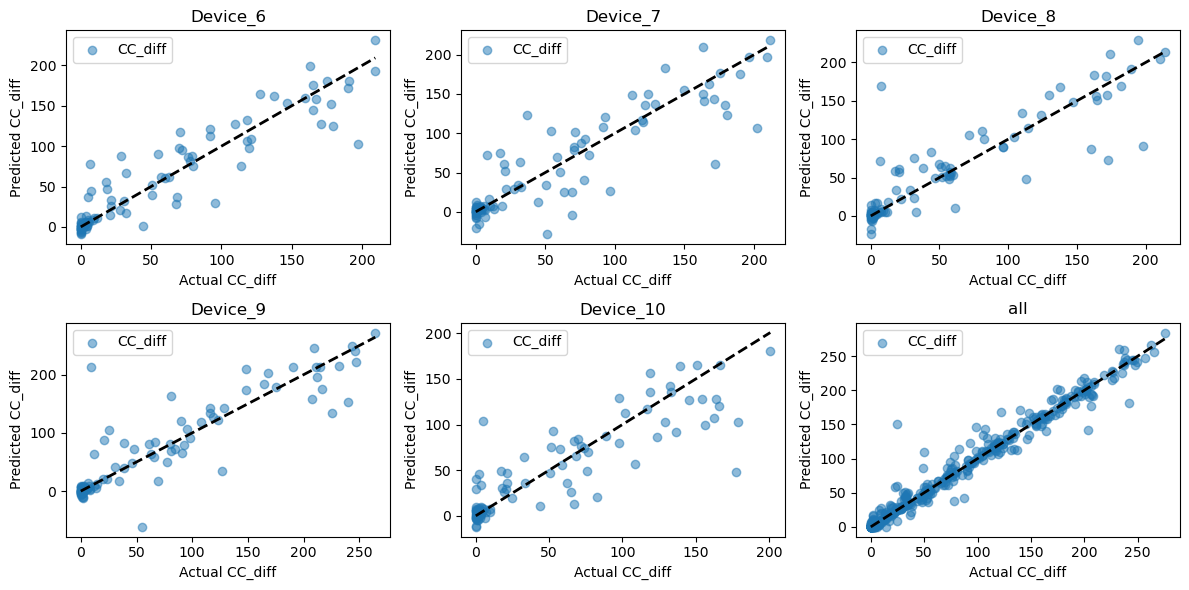

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

gbr6 = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr6.fit(X_train6, y_train6)
y_pred6 = gbr6.predict(X_test6)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()

gbr7 = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr7.fit(X_train7, y_train7)
y_pred7 = gbr7.predict(X_test7)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()

gbr8 = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr8.fit(X_train8, y_train8)
y_pred8 = gbr8.predict(X_test8)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()

gbr9 = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr9.fit(X_train9, y_train9)
y_pred9 = gbr9.predict(X_test9)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()

gbr10 = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr10.fit(X_train10, y_train10)
y_pred10 = gbr10.predict(X_test10)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=1, max_depth=5, random_state=100)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
y_pred[y_pred < 0] = 0

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()

plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 383, number of used features: 17
[LightGBM] [Info] Start training from score 66.278590
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

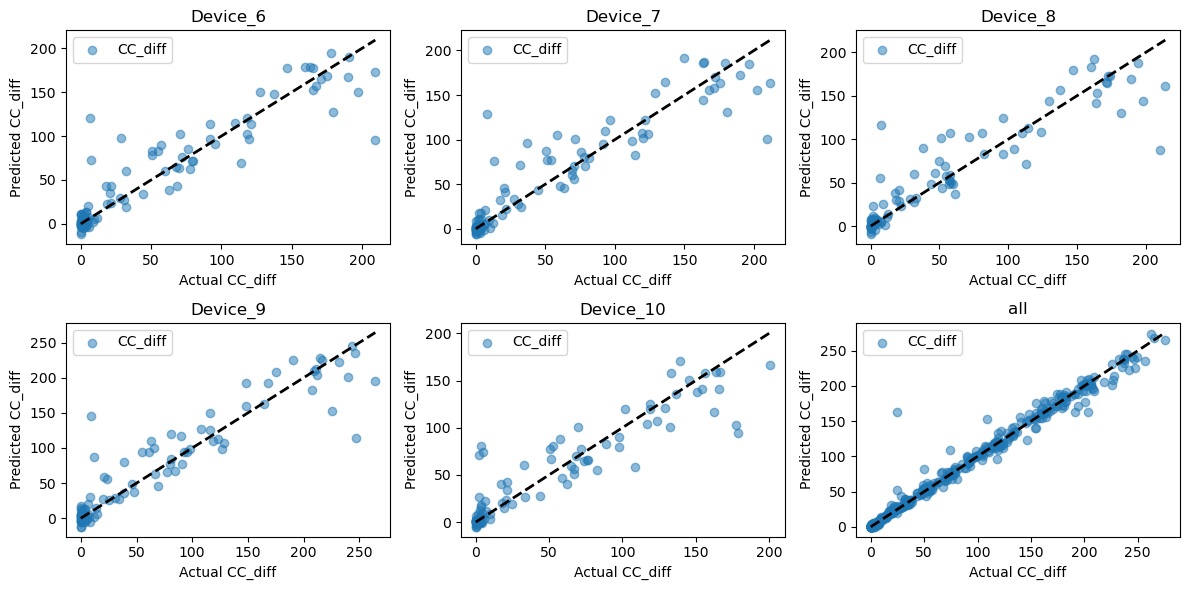

In [43]:
import lightgbm as lgb

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.2,
    'feature_fraction': 0.9,
}

lgb_train6 = lgb.Dataset(X_train6, y_train6)
lgb_test6 = lgb.Dataset(X_test6, y_test6, reference=lgb_train6)

gbm6 = lgb.train(params, lgb_train6, num_boost_round=100, valid_sets=[lgb_test6])
y_pred6 = gbm6.predict(X_test6, num_iteration=gbm6.best_iteration)


axs[0, 0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0, 0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0, 0].set_title('Device_6')
axs[0, 0].set_ylabel('Predicted CC_diff')
axs[0, 0].set_xlabel('Actual CC_diff')
axs[0, 0].legend()


lgb_train7 = lgb.Dataset(X_train7, y_train7)
lgb_test7 = lgb.Dataset(X_test7, y_test7, reference=lgb_train7)

gbm7 = lgb.train(params, lgb_train7, num_boost_round=100, valid_sets=[lgb_test7])
y_pred7 = gbm7.predict(X_test7, num_iteration=gbm7.best_iteration)


axs[0, 1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0, 1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0, 1].set_title('Device_7')
axs[0, 1].set_ylabel('Predicted CC_diff')
axs[0, 1].set_xlabel('Actual CC_diff')
axs[0, 1].legend()


lgb_train8 = lgb.Dataset(X_train8, y_train8)
lgb_test8 = lgb.Dataset(X_test8, y_test8, reference=lgb_train8)

gbm8 = lgb.train(params, lgb_train8, num_boost_round=100, valid_sets=[lgb_test8])
y_pred8 = gbm8.predict(X_test8, num_iteration=gbm8.best_iteration)



axs[0, 2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0, 2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0, 2].set_title('Device_8')
axs[0, 2].set_ylabel('Predicted CC_diff')
axs[0, 2].set_xlabel('Actual CC_diff')
axs[0, 2].legend()


lgb_train9 = lgb.Dataset(X_train9, y_train9)
lgb_test9 = lgb.Dataset(X_test9, y_test9, reference=lgb_train9)

gbm9 = lgb.train(params, lgb_train9, num_boost_round=100, valid_sets=[lgb_test9])
y_pred9 = gbm9.predict(X_test9, num_iteration=gbm9.best_iteration)



axs[1, 0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1, 0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1, 0].set_title('Device_9')
axs[1, 0].set_ylabel('Predicted CC_diff')
axs[1, 0].set_xlabel('Actual CC_diff')
axs[1, 0].legend()


lgb_train10 = lgb.Dataset(X_train10, y_train10)
lgb_test10 = lgb.Dataset(X_test10, y_test10, reference=lgb_train10)

gbm10 = lgb.train(params, lgb_train10, num_boost_round=100, valid_sets=[lgb_test10])
y_pred10 = gbm10.predict(X_test10, num_iteration=gbm10.best_iteration)


axs[1, 1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1, 1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1, 1].set_title('Device_10')
axs[1, 1].set_ylabel('Predicted CC_diff')
axs[1, 1].set_xlabel('Actual CC_diff')
axs[1, 1].legend()


lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=[lgb_test])
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred[y_pred < 0] = 0

axs[1, 2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1, 2].set_title('all')
axs[1, 2].set_ylabel('Predicted CC_diff')
axs[1, 2].set_xlabel('Actual CC_diff')
axs[1, 2].legend()


print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()


plt.tight_layout()
plt.show()

device_6:
MAE: 17.226246559256904
MSE: 608.0673338674942
RMSE: 24.659021348534782
R2: 0.8556217479859742

device_7:
MAE: 16.881631672456084
MSE: 584.6957150489692
RMSE: 24.18048210952315
R2: 0.8635841911240506

device_8:
MAE: 16.40660732208544
MSE: 542.4746839680904
RMSE: 23.291085933637582
R2: 0.8691535237190117

device_9:
MAE: 19.428202342619254
MSE: 748.9328685022547
RMSE: 27.366637873554264
R2: 0.8838640373829436

device_10:
MAE: 16.022693402001234
MSE: 544.1813420527061
RMSE: 23.327694743645505
R2: 0.8423894059854

all:
MAE: 11.245747434340927
MSE: 367.9298157864844
RMSE: 19.181496703502685
R2: 0.9333716968000481



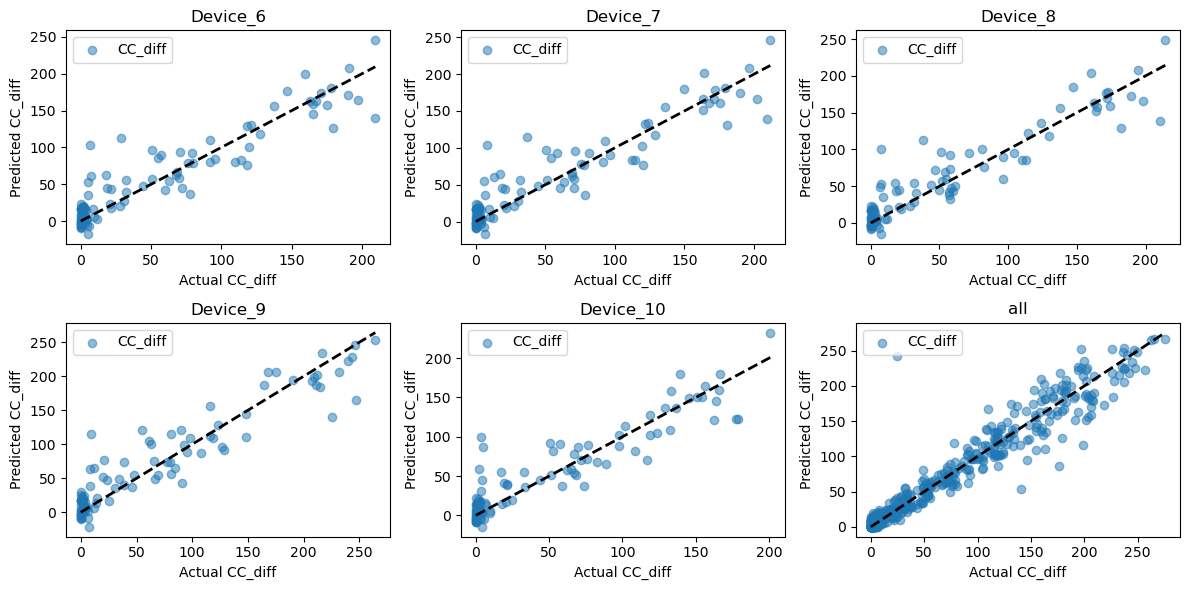

In [48]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

X_train_scaled6 = scaler_X.fit_transform(X_train6)
X_test_scaled6 = scaler_X.transform(X_test6)
y_train_scaled6 = scaler_y.fit_transform(y_train6.to_numpy().reshape(-1, 1)).ravel()

svr_rbf6 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf6.fit(X_train_scaled6, y_train_scaled6)

y_pred_scaled6 = svr_rbf6.predict(X_test_scaled6)
y_pred_scaled6_reshaped = y_pred_scaled6.reshape(-1, 1)
y_pred6 = scaler_y.inverse_transform(y_pred_scaled6_reshaped)

print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

axs[0,0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0,0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0,0].set_title('Device_6')
axs[0,0].set_ylabel('Predicted CC_diff')
axs[0,0].set_xlabel('Actual CC_diff')
axs[0,0].legend()

X_train_scaled7 = scaler_X.fit_transform(X_train7)
X_test_scaled7 = scaler_X.transform(X_test7)
y_train_scaled7 = scaler_y.fit_transform(y_train7.to_numpy().reshape(-1, 1)).ravel()

svr_rbf7 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf7.fit(X_train_scaled7, y_train_scaled7)

y_pred_scaled7 = svr_rbf7.predict(X_test_scaled7)
y_pred_scaled7_reshaped = y_pred_scaled7.reshape(-1, 1)
y_pred7 = scaler_y.inverse_transform(y_pred_scaled7_reshaped)

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

axs[0,1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0,1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0,1].set_title('Device_7')
axs[0,1].set_ylabel('Predicted CC_diff')
axs[0,1].set_xlabel('Actual CC_diff')
axs[0,1].legend()


X_train_scaled8 = scaler_X.fit_transform(X_train8)
X_test_scaled8 = scaler_X.transform(X_test8)
y_train_scaled8 = scaler_y.fit_transform(y_train8.to_numpy().reshape(-1, 1)).ravel()

svr_rbf8 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf8.fit(X_train_scaled8, y_train_scaled8)

y_pred_scaled8 = svr_rbf8.predict(X_test_scaled8)
y_pred_scaled8_reshaped = y_pred_scaled8.reshape(-1, 1)
y_pred8 = scaler_y.inverse_transform(y_pred_scaled8_reshaped)

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

axs[0,2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0,2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0,2].set_title('Device_8')
axs[0,2].set_ylabel('Predicted CC_diff')
axs[0,2].set_xlabel('Actual CC_diff')
axs[0,2].legend()


X_train_scaled9 = scaler_X.fit_transform(X_train9)
X_test_scaled9 = scaler_X.transform(X_test9)
y_train_scaled9 = scaler_y.fit_transform(y_train9.to_numpy().reshape(-1, 1)).ravel()

svr_rbf9 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf9.fit(X_train_scaled9, y_train_scaled9)

y_pred_scaled9 = svr_rbf9.predict(X_test_scaled9)
y_pred_scaled9_reshaped = y_pred_scaled9.reshape(-1, 1)
y_pred9 = scaler_y.inverse_transform(y_pred_scaled9_reshaped)

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

axs[1,0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1,0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1,0].set_title('Device_9')
axs[1,0].set_ylabel('Predicted CC_diff')
axs[1,0].set_xlabel('Actual CC_diff')
axs[1,0].legend()

X_train_scaled10 = scaler_X.fit_transform(X_train10)
X_test_scaled10 = scaler_X.transform(X_test10)
y_train_scaled10 = scaler_y.fit_transform(y_train10.to_numpy().reshape(-1, 1)).ravel()

svr_rbf10 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf10.fit(X_train_scaled10, y_train_scaled10)

y_pred_scaled10 = svr_rbf10.predict(X_test_scaled10)
y_pred_scaled10_reshaped = y_pred_scaled10.reshape(-1, 1)
y_pred10 = scaler_y.inverse_transform(y_pred_scaled10_reshaped)

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

axs[1,1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1,1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1,1].set_title('Device_10')
axs[1,1].set_ylabel('Predicted CC_diff')
axs[1,1].set_xlabel('Actual CC_diff')
axs[1,1].legend()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = svr_rbf.predict(X_test_scaled)
y_pred_scaled_reshaped = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled_reshaped)
y_pred[y_pred < 0] = 0


print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()

axs[1,2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1,2].set_title('all')
axs[1,2].set_ylabel('Predicted CC_diff')
axs[1,2].set_xlabel('Actual CC_diff')
axs[1,2].legend()


plt.tight_layout()
plt.show()

Epoch 1/100
10/10 [==============================] - 0s 6ms/step - loss: 4443.1553 - val_loss: 2352.7473
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1521.5553 - val_loss: 1441.5732
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 675.2498 - val_loss: 1175.2677
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 484.3677 - val_loss: 1079.4727
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 439.4412 - val_loss: 1567.2703
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 604.7151 - val_loss: 1156.4064
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 349.1293 - val_loss: 1024.2346
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 330.2685 - val_loss: 965.3589
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 345.1184 - val_loss: 948.1273
Epoch 10/100
10/10 [==============================] - 0s 2ms/ste

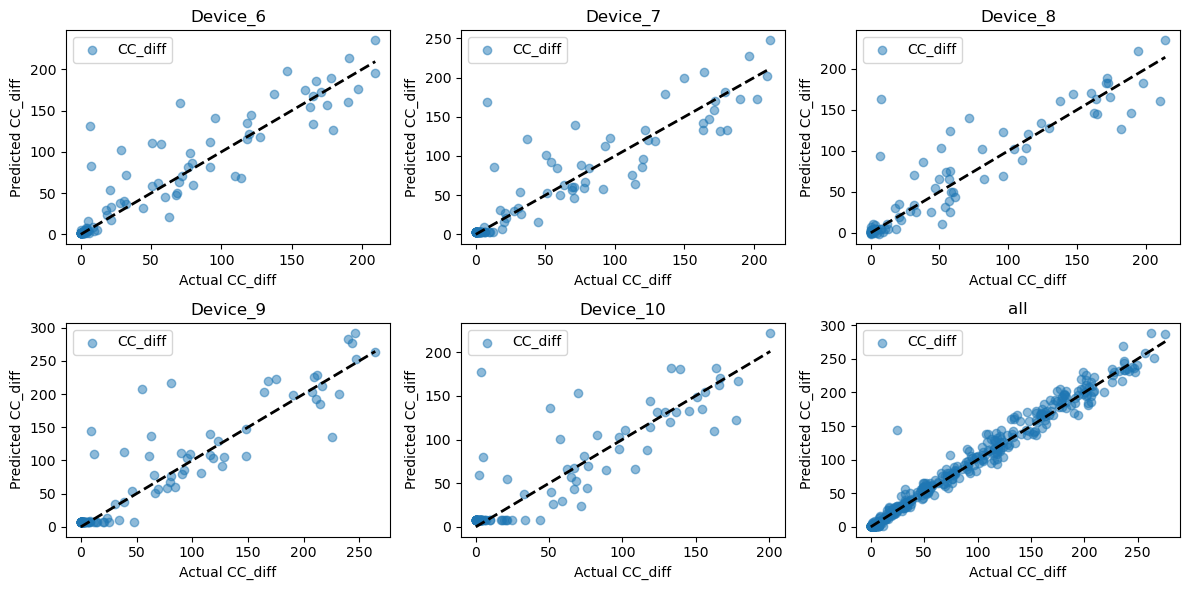

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam

scaler = StandardScaler()
optimizer = Adam(learning_rate=0.05)

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

X_train_scaled6 = scaler.fit_transform(X_train6)
X_test_scaled6 = scaler.transform(X_test6)

model6 = Sequential([
    Dense(81, activation='relu', input_shape=(X_train_scaled6.shape[1],)),
    Dense(81, activation='relu'),
    Dense(1)
])

model6.compile(optimizer=optimizer, loss='mean_squared_error')
history6 = model6.fit(X_train_scaled6, y_train6, validation_split=0.2, epochs=100, batch_size=32)
y_pred6 = model6.predict(X_test_scaled6)


axs[0, 0].scatter(y_test6, y_pred6, alpha=0.5, label='CC_diff')
axs[0, 0].plot([y_test6.min(), y_test6.max()], [y_test6.min(), y_test6.max()], 'k--', lw=2)
axs[0, 0].set_title('Device_6')
axs[0, 0].set_ylabel('Predicted CC_diff')
axs[0, 0].set_xlabel('Actual CC_diff')
axs[0, 0].legend()


X_train_scaled7 = scaler.fit_transform(X_train7)
X_test_scaled7 = scaler.transform(X_test7)

model7 = Sequential([
    Dense(81, activation='relu', input_shape=(X_train_scaled7.shape[1],)),
    Dense(81, activation='relu'),
    Dense(1)
])

model7.compile(optimizer=optimizer, loss='mean_squared_error')
history7 = model7.fit(X_train_scaled7, y_train7, validation_split=0.2, epochs=100, batch_size=32)
y_pred7 = model7.predict(X_test_scaled7)

axs[0, 1].scatter(y_test7, y_pred7, alpha=0.5, label='CC_diff')
axs[0, 1].plot([y_test7.min(), y_test7.max()], [y_test7.min(), y_test7.max()], 'k--', lw=2)
axs[0, 1].set_title('Device_7')
axs[0, 1].set_ylabel('Predicted CC_diff')
axs[0, 1].set_xlabel('Actual CC_diff')
axs[0, 1].legend()


X_train_scaled8 = scaler.fit_transform(X_train8)
X_test_scaled8 = scaler.transform(X_test8)

model8 = Sequential([
    Dense(81, activation='relu', input_shape=(X_train_scaled8.shape[1],)),
    Dense(81, activation='relu'),
    Dense(1)
])

model8.compile(optimizer=optimizer, loss='mean_squared_error')
history8 = model8.fit(X_train_scaled8, y_train8, validation_split=0.2, epochs=100, batch_size=32)
y_pred8 = model8.predict(X_test_scaled8)

axs[0, 2].scatter(y_test8, y_pred8, alpha=0.5, label='CC_diff')
axs[0, 2].plot([y_test8.min(), y_test8.max()], [y_test8.min(), y_test8.max()], 'k--', lw=2)
axs[0, 2].set_title('Device_8')
axs[0, 2].set_ylabel('Predicted CC_diff')
axs[0, 2].set_xlabel('Actual CC_diff')
axs[0, 2].legend()


X_train_scaled9 = scaler.fit_transform(X_train9)
X_test_scaled9 = scaler.transform(X_test9)

model9 = Sequential([
    Dense(81, activation='relu', input_shape=(X_train_scaled9.shape[1],)),
    Dense(81, activation='relu'),
    Dense(1)
])

model9.compile(optimizer=optimizer, loss='mean_squared_error')
history9 = model9.fit(X_train_scaled9, y_train9, validation_split=0.2, epochs=100, batch_size=32)
y_pred9 = model9.predict(X_test_scaled9)


axs[1, 0].scatter(y_test9, y_pred9, alpha=0.5, label='CC_diff')
axs[1, 0].plot([y_test9.min(), y_test9.max()], [y_test9.min(), y_test9.max()], 'k--', lw=2)
axs[1, 0].set_title('Device_9')
axs[1, 0].set_ylabel('Predicted CC_diff')
axs[1, 0].set_xlabel('Actual CC_diff')
axs[1, 0].legend()

X_train_scaled10 = scaler.fit_transform(X_train10)
X_test_scaled10 = scaler.transform(X_test10)

model10 = Sequential([
    Dense(81, activation='relu', input_shape=(X_train_scaled10.shape[1],)),
    Dense(81, activation='relu'),
    Dense(1)
])

model10.compile(optimizer=optimizer, loss='mean_squared_error')
history10 = model10.fit(X_train_scaled10, y_train10, validation_split=0.2, epochs=100, batch_size=32)
y_pred10 = model10.predict(X_test_scaled10)


axs[1, 1].scatter(y_test10, y_pred10, alpha=0.5, label='CC_diff')
axs[1, 1].plot([y_test10.min(), y_test10.max()], [y_test10.min(), y_test10.max()], 'k--', lw=2)
axs[1, 1].set_title('Device_10')
axs[1, 1].set_ylabel('Predicted CC_diff')
axs[1, 1].set_xlabel('Actual CC_diff')
axs[1, 1].legend()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(81, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(81, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)
y_pred = model.predict(X_test_scaled)
y_pred[y_pred < 0] = 0

axs[1, 2].scatter(y_test, y_pred, alpha=0.5, label='CC_diff')
axs[1, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1, 2].set_title('all')
axs[1, 2].set_ylabel('Predicted CC_diff')
axs[1, 2].set_xlabel('Actual CC_diff')
axs[1, 2].legend()


print("device_6:")
print('MAE:', mean_absolute_error(y_test6, y_pred6))
print('MSE:', mean_squared_error(y_test6, y_pred6))
print('RMSE:', np.sqrt(mean_squared_error(y_test6, y_pred6)))
print('R2:', r2_score(y_test6, y_pred6))
print()

print("device_7:")
print('MAE:', mean_absolute_error(y_test7, y_pred7))
print('MSE:', mean_squared_error(y_test7, y_pred7))
print('RMSE:', np.sqrt(mean_squared_error(y_test7, y_pred7)))
print('R2:', r2_score(y_test7, y_pred7))
print()

print("device_8:")
print('MAE:', mean_absolute_error(y_test8, y_pred8))
print('MSE:', mean_squared_error(y_test8, y_pred8))
print('RMSE:', np.sqrt(mean_squared_error(y_test8, y_pred8)))
print('R2:', r2_score(y_test8, y_pred8))
print()

print("device_9:")
print('MAE:', mean_absolute_error(y_test9, y_pred9))
print('MSE:', mean_squared_error(y_test9, y_pred9))
print('RMSE:', np.sqrt(mean_squared_error(y_test9, y_pred9)))
print('R2:', r2_score(y_test9, y_pred9))
print()

print("device_10:")
print('MAE:', mean_absolute_error(y_test10, y_pred10))
print('MSE:', mean_squared_error(y_test10, y_pred10))
print('RMSE:', np.sqrt(mean_squared_error(y_test10, y_pred10)))
print('R2:', r2_score(y_test10, y_pred10))
print()

print("all:")
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print()


plt.tight_layout()
plt.show()